0.25
Convergence condition for x = True
Convergence condition for y = True


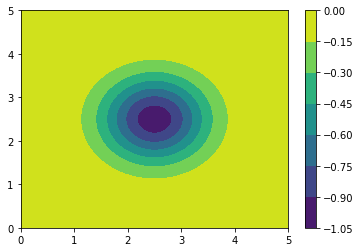

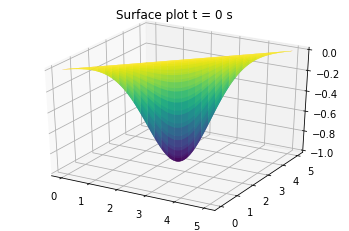

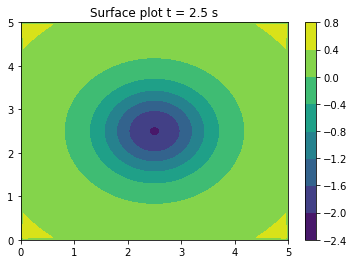

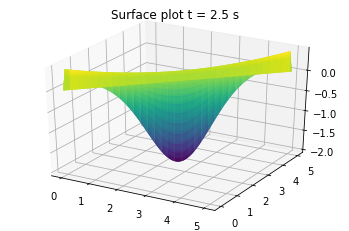

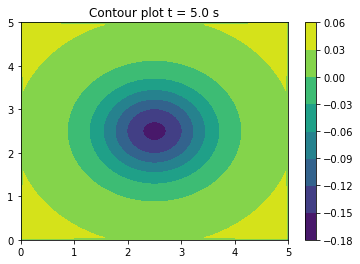

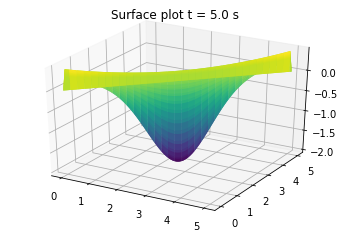

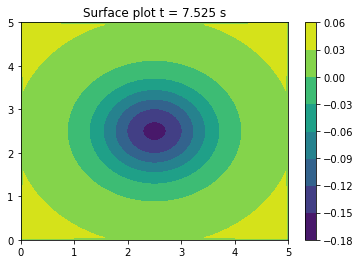

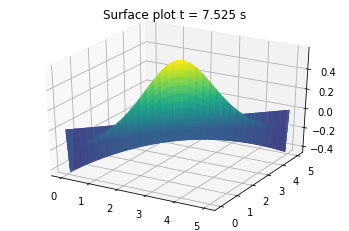

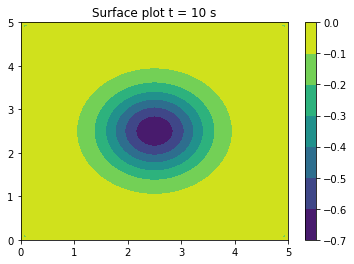

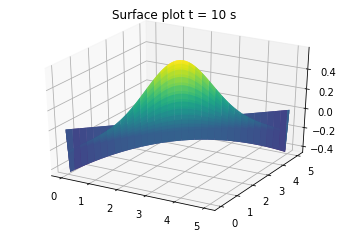

CW done: I deserve a good mark


In [47]:
# In this section I am importing all the libraries I will need

import numpy as np
import matplotlib.pyplot as pl
import math
from mpl_toolkits import mplot3d


# In this section I am setting the domain of solution and the discretised grid

#set domain
xa = 0
xb = 5
ya = 0
yb = 5
ta = 0
tb = 10

#set increments
dx = 0.05
dy = 0.05
dt = 0.025

#set parameter beta
c2 = 1.2

#calculate sx, sy
sx = c2 * ((dt)**2) / ((dx)**2)
sy = c2 * ((dt)**2) / ((dy)**2)

print(sy/c2)

#test for convergence
print("Convergence condition for x = {}".format(((dt)**2) / ((dx)**2) < c2))
print("Convergence condition for y = {}".format(((dt)**2) / ((dy)**2) < c2))




# In this section I am defining arrays I would need (if neeeded)

# define arrays and lengths
x = np.arange(xa,xb+dx,dx)
Nx = len(x)
y = np.arange(ya,yb+dy,dy)
Ny = len(y)
t = np.arange(ta,tb+dt,dt)
Nt = len(t)


#define solution matrix
W = np.ndarray((Nt,Nx,Ny))

#set meshgrid
Yg, Xg = np.meshgrid(y,x)

# In this section I am setting the boundary conditions/initial values

 
#Apply Initial conditions
#f = lambda x,y: abs(np.sin(5*x) * np.cos(5*y)*5)  # the function f(x,y) at t=0
f = lambda x,y: -math.exp(-((x-2.5)**2 + (y-2.5)**2))
g = lambda x,y: (x-2.5)**2 + (y-2.5)**2 # the derivative of the function at t=0: f'(x,y) = g(x,y) ******change to smt sensible

for i in range(0,Nx):
    for j in range(0,Ny):
        W[0,i,j] = f(x[i],y[j])

        
#Apply Boundary conditions: set the value at walls at all timesteps to zero
W[:,0,:] = 0
W[:,-1,:] = 0
W[:,:,0] = 0
W[:,:,-1] = 0




# In this section I am implementing the numerical method

# first use the unique method for k = 1
for i in range(1,Nx-1): 
    for j in range(1,Ny-1):
        W[1,i,j] = (2 * W[0,i,j]*(1-sx-sy)) + (dt*g(x[i],y[j])) + (sx/2 * (W[0,i+1,j] + W[0,i-1,j])) + (sy/ 2* (W[0,i,j+1] + W[0,i,j-1]))

# now for all other timesteps
for k in range(1,Nt-1):
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):        
            W[k+1,i,j] = (2 * W[k,i,j]*(1-sx-sy)) - W[k-1,i,j] + (sx * (W[k,i+1,j] + W[k,i-1,j])) + (sy *(W[k,i,j+1] + W[k,i,j-1]))
            
        


# In this section I am showing the results

# Plot Initial state: t=0

#2d Color-bars
pl.contourf(Xg,Yg,W[0,:,:])
pl.colorbar()
#3D Plot
fig = pl.figure()
ax = pl.axes(projection='3d')

ax.plot_surface(x,y,W[0,:,:],cmap='viridis', edgecolor='none')
ax.set_title('Surface plot t = 0 s')
pl.show()


# Plot Intermediary state: t= 1/4 tb
#2d Color-bars
pl.contourf(Xg,Yg,W[round(Nt/4),:,:])
pl.colorbar()
pl.title('Surface plot t = {} s'.format(t[round(Nt/4)]))

#3D Plot
fig = pl.figure()
ax = pl.axes(projection='3d')

ax.plot_surface(x,y,W[round(Nt/4),:,:],cmap='viridis', edgecolor='none')
ax.set_title('Surface plot t = {} s'.format(t[round(Nt/4)]))
pl.show()


# Plot Intermediary state: t = 1/2 tb
#2d Color-bars
pl.contourf(Xg,Yg,W[round(Nt/2),:,:])
pl.colorbar()
pl.title('Contour plot t = {} s'.format(t[round(Nt/2)]))

#3D Plot
fig = pl.figure()
ax = pl.axes(projection='3d')

ax.plot_surface(x,y,W[round(Nt/4),:,:],cmap='viridis', edgecolor='none')
ax.set_title('Surface plot t = {} s'.format(t[round(Nt/2)]))
pl.show()

# Plot Intermediary state: t = 3/4 tb
#2d Color-bars
pl.contourf(Xg,Yg,W[round(Nt/2),:,:])
pl.colorbar()
pl.title('Surface plot t = {} s'.format(t[round(Nt*3/4)]))

#3D Plot
fig = pl.figure()
ax = pl.axes(projection='3d')

ax.plot_surface(x,y,W[round(Nt*3/4),:,:],cmap='viridis', edgecolor='none')
ax.set_title('Surface plot t = {} s'.format(t[round(Nt*3/4)]))
pl.show()

# Plot Final state
#2d Color-bars
pl.contourf(Xg,Yg,W[-1,:,:])
pl.colorbar()
pl.title('Surface plot t = {} s'.format(tb))

#3D Plot
fig = pl.figure()
ax = pl.axes(projection='3d')


ax.plot_surface(x,y,W[round(Nt*3/4),:,:],cmap='viridis', edgecolor='none')
ax.set_title('Surface plot t = {} s'.format(tb))
pl.show()






# In this section I am celebrating
print('CW done: I deserve a good mark')

